<a href="https://colab.research.google.com/github/Roms-tripleten/everpeak_da_82/blob/main/notebooks/EverPeak_Analisis_de_ventas_y_segmentacion_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis estadístico para detectar patrones y outliers III 🐍🖥️✍️

## Objetivos academicos

- Mostrar ejemplo de resumen estadístico para el dataset *EverPeak*
- Cargar nuestro reporte a Github


## EverPeak Holdings  📊🏙️

---

### **Introducción**

A finales del 2024, SilverBasket Retail Group firmó un acuerdo para incorporar a **EverPeak Holdings** dentro de su portafolio de marcas.

Antes de concretar la adquisición, el equipo de **Estrategia e Integración** debe revisar la calidad y estructura de los datos transaccionales de EverPeak. Este tipo de revisión es un paso regular en procesos de incorporación de empresas, porque garantiza que los futuros análisis de clientes, ventas y márgenes partan de información confiable.

El equipo necesita responder tres preguntas centrales:

- ¿Qué tan completos y consistentes son los datos actuales?
- ¿Qué patrones iniciales revelan el comportamiento, distribución y valor de los clientes?
- ¿Existen segmentos de alto valor que representen una oportunidad para el negocio?

### Vision general

---

En esta sección presentamos una **visión general del conjunto de datos de EverPeak**, con el objetivo de entender su estructura, volumen y calidad antes de avanzar a análisis más profundos 📊🔍.

El dataset contiene **5,008 observaciones** y **11 columnas**, donde cada fila representa una transacción individual. Las variables incluyen identificadores (`order_id`, `customer_id`), información temporal (`order_date`), atributos del producto y compra (`product_category`, `price`, `quantity`, `order_value`), así como datos contextuales del cliente (`payment_method`, `city`, `state`, `customer_age`).

🧠 **Diagnóstico del formato de datos**
- Las variables numéricas principales (`price`, `quantity`, `order_value`) están correctamente almacenadas como enteros.
- `order_date` se encuentra como tipo `object`, por lo que será necesario convertirla a formato `datetime` para análisis temporales 📅.
- `customer_age` está en formato `float`, lo cual sugiere la presencia de valores faltantes o transformaciones previas.

⚠️ **Datos faltantes**
- `city` presenta valores nulos (~100 registros).
- `state` tiene una mayor cantidad de datos faltantes (~100 registros).
- `customer_age` es la variable con más valores perdidos (~150 registros), lo cual es relevante dado que se planean análisis de segmentación por edad.

🧹 **Juicio sobre la calidad y limpieza**
En general, el conjunto de datos muestra **buena calidad estructural** y un nivel de datos faltantes **moderado y manejable**.  
Será necesario:
- Convertir tipos de datos (`order_date`).
- Evaluar estrategias para tratar valores nulos (imputación o exclusión según el análisis).
- Validar rangos lógicos en variables como `price`, `quantity` y `customer_age`.

> 💡 *El dataset es adecuado para análisis exploratorio y de negocio, con necesidades de limpieza típicas y controladas para un contexto real de integración empresarial.*


#### Código de referencia

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('pastel')

In [ ]:
everpeak_retail_raw = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/everpeak_retail.csv")
everpeak_retail_raw.shape

(5008, 11)

In [ ]:
everpeak_retail_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          5008 non-null   int64  
 1   order_date        5000 non-null   object 
 2   customer_id       5008 non-null   int64  
 3   product_category  5008 non-null   object 
 4   price             5008 non-null   int64  
 5   quantity          5008 non-null   int64  
 6   order_value       5008 non-null   int64  
 7   payment_method    5008 non-null   object 
 8   city              4908 non-null   object 
 9   state             4908 non-null   object 
 10  customer_age      4858 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 430.5+ KB


### Limpieza de datos

---

En esta sección se documenta el **proceso de limpieza de datos y la construcción del pipeline de preparación** para el dataset de EverPeak 🧼⚙️, con el objetivo de garantizar consistencia, calidad y reutilización del flujo de trabajo.

El pipeline aplica una estrategia **modular y reproducible**, separando la limpieza de variables categóricas y numéricas.  
Para las **columnas de texto** (`product_category`, `payment_method`, `city`, `state`), se estandarizan valores mediante eliminación de espacios, normalización a minúsculas y sustitución de valores centinela (`?`) y nulos por la categoría `"Unknown"`. Esto asegura consistencia semántica y evita problemas en agrupaciones posteriores.

En el caso de las **variables numéricas** (`price`, `customer_age`), los valores se fuerzan a formato numérico, se identifican valores centinela (`-999`) y se reemplazan por valores faltantes. Posteriormente, estos faltantes se imputan usando la **media de la variable**, manteniendo el tamaño del dataset sin introducir valores extremos.

Adicionalmente, la variable `order_date` se convierte explícitamente a formato `datetime`, permitiendo análisis temporales confiables. Finalmente, se eliminan registros duplicados para asegurar la unicidad de las transacciones.

🧠 **Resultado del pipeline**
Tras la ejecución del pipeline, el dataset conserva **5,008 observaciones y 11 columnas**, sin valores nulos y con tipos de datos correctamente definidos (`datetime`, `int`, `float` y `object`), lo que indica una **mejora clara en la calidad y consistencia de los datos**.

> 💡 *Este enfoque permite repetir el proceso de limpieza de forma automática y consistente, facilitando futuras integraciones y análisis dentro del portafolio de SilverBasket Retail Group.*


#### Código de referencia

In [ ]:
def clean_text_columns(df,text_cols):
    sentinels=['?']
    df_copy=df.copy()
    for col in text_cols:
        df_copy[col]=df_copy[col].str.strip().str.lower().str.replace(sentinels,'Unknown').fillna('Unknown')
    return df_copy

def clean_numeric_columns(df,numeric_cols):
    sentinels=[-999]
    df_copy=df.copy()
    for col in numeric_cols:
        df_copy[col]=pd.to_numeric(df_copy[col],errors='coerce')
        df_copy[col] = df_copy[col].replace(sentinels,pd.NA)
        df_copy[col] = df_copy[col].fillna(df_copy[col].mean())
    return df_copy

def pipeline_everpeak_retail():
    text_cols=[ 'product_category', 'payment_method', 'city', 'state']
    numeric_cols=[ 'price', 'customer_age']
    df =  pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/everpeak_retail.csv")
    df= clean_text_columns(df,text_cols)
    df= clean_numeric_columns(df, numeric_cols)
    df['order_date']= pd.to_datetime(df['order_date'],errors='coerce')
    df.drop_duplicates(inplace=True)
    return df

everpeak_retail=pipeline_everpeak_retail()

/tmp/ipython-input-432948178.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[col] = df_copy[col].fillna(df_copy[col].mean())


In [ ]:
everpeak_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          5008 non-null   int64         
 1   order_date        5000 non-null   datetime64[ns]
 2   customer_id       5008 non-null   int64         
 3   product_category  5008 non-null   object        
 4   price             5008 non-null   int64         
 5   quantity          5008 non-null   int64         
 6   order_value       5008 non-null   int64         
 7   payment_method    5008 non-null   object        
 8   city              5008 non-null   object        
 9   state             5008 non-null   object        
 10  customer_age      5008 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 430.5+ KB


In [ ]:
everpeak_retail.head()

,order_id,order_date,customer_id,product_category,price,quantity,order_value,payment_method,city,state,customer_age
0,1,2024-02-02,2616,Unknown,269,50,13385,Unknown,Unknown,Unknown,66.0
1,2,2024-10-10,1736,Unknown,66,0,660,Unknown,Unknown,Unknown,24.0
2,3,2024-08-27,2543,Unknown,267,0,5073,Unknown,Unknown,Unknown,23.0
3,4,2024-06-09,2252,Unknown,114,125,14290,Unknown,Unknown,Unknown,70.0
4,5,2024-06-07,1583,Unknown,729,16,11754,Unknown,Unknown,Unknown,75.0


### Análisis estadístico de `order_value` and `customer_age` y manejo de atípicos

---

Como parte del proceso de validación de los datos de **EverPeak**, es fundamental realizar un **análisis estadístico de `order_value` y `customer_age`** 🔍📊, ya que estas variables serán la base para la **segmentación de clientes** tras la integración con SilverBasket.

En este contexto, identificar **valores atípicos** permite evaluar si existen montos de compra inusualmente altos o edades fuera de los rangos esperados para el mercado de EverPeak. Este paso es clave para distinguir entre **clientes genuinamente excepcionales** (por ejemplo, compradores de alto valor) y posibles **errores de registro o casos no representativos**.

Un tratamiento adecuado de estos atípicos asegura que los segmentos definidos reflejen el **comportamiento real de la base de clientes de EverPeak**, evitando sesgos en métricas como ticket promedio, valor del cliente o distribución por edad.

> 💡 *Este análisis fortalece la confiabilidad de la segmentación y aporta mayor solidez a las conclusiones estratégicas del proceso de adquisición.*


#### `order_value`

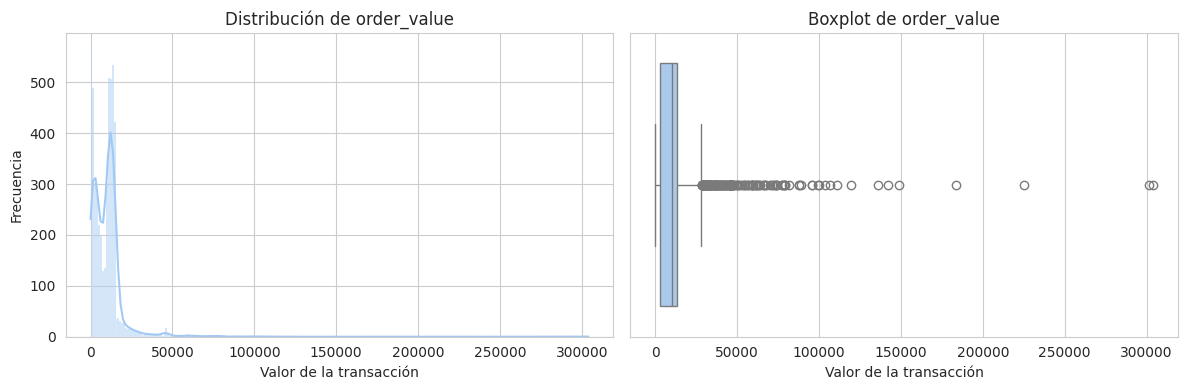

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=everpeak_retail,x='order_value',kde=True,ax=axes[0])
axes[0].set_title('Distribución de order_value')
axes[0].set_xlabel('Valor de la transacción')
axes[0].set_ylabel('Frecuencia')
sns.boxplot(data=everpeak_retail,x='order_value',ax=axes[1])
axes[1].set_title('Boxplot de order_value')
axes[1].set_xlabel('Valor de la transacción')
axes[1].set_ylabel('')  # opcional, el boxplot horizontal no necesita eje y
plt.tight_layout()
plt.show()

In [ ]:
def outlier_iqr(x,q1,q3):
    iqr=q3-q1
    return not((q1-1.5*iqr)<x<(q3+1.5*iqr))

In [ ]:
q1=everpeak_retail['order_value'].quantile(0.25)
q3=everpeak_retail['order_value'].quantile(0.75)
everpeak_retail['order_value_outlier_iqr']= everpeak_retail['order_value'].apply(outlier_iqr,q1=q1,q3=q3)

In [ ]:
everpeak_retail['order_value_outlier_iqr'].sum()

np.int64(165)

In [ ]:
everpeak_retail.head()

,order_id,order_date,customer_id,product_category,price,quantity,order_value,payment_method,city,state,customer_age,order_value_outlier_iqr
0,1,2024-02-02,2616,Unknown,269,50,13385,Unknown,Unknown,Unknown,66.0,False
1,2,2024-10-10,1736,Unknown,66,0,660,Unknown,Unknown,Unknown,24.0,False
2,3,2024-08-27,2543,Unknown,267,0,5073,Unknown,Unknown,Unknown,23.0,False
3,4,2024-06-09,2252,Unknown,114,125,14290,Unknown,Unknown,Unknown,70.0,False
4,5,2024-06-07,1583,Unknown,729,16,11754,Unknown,Unknown,Unknown,75.0,False


In [ ]:
everpeak_retail=everpeak_retail[everpeak_retail['order_value_outlier_iqr']==False]
everpeak_retail.drop(columns=['order_value_outlier_iqr'],inplace=True)

A partir del análisis gráfico de la variable **`order_value`**, se observa una **distribución fuertemente asimétrica a la derecha** 📈. La mayoría de las transacciones se concentran en valores bajos y medios, mientras que existe una **cola larga** de compras con montos elevados.

El histograma confirma esta concentración de valores bajos, y el boxplot evidencia la presencia de múltiples **valores atípicos** ubicados muy por encima del rango intercuartílico. Utilizando el criterio de **IQR**, se identificaron **165 outliers**, lo que representa una **proporción pequeña** respecto al total de transacciones del dataset.

🧠 **Decisión de tratamiento**
Dado que:
- Los outliers representan una fracción reducida del conjunto de datos  
- No se cuenta con información adicional que confirme si estos montos extremos corresponden a compras legítimas o a errores de registro  
- El objetivo principal es una segmentación de clientes estable y representativa  

Se decide **eliminar estos registros atípicos** para evitar que distorsionen métricas como el ticket promedio, percentiles y reglas de segmentación basadas en valor.

> 💡 *Esta decisión prioriza la robustez del análisis y permite construir segmentos más consistentes con el comportamiento general de los clientes de EverPeak.*


In [ ]:
everpeak_retail['order_value'].describe().to_frame().T.round(2)

,count,mean,std,min,25%,50%,75%,max
order_value,4843.0,8507.72,5646.25,12.0,2891.5,10136.0,12900.0,27968.0


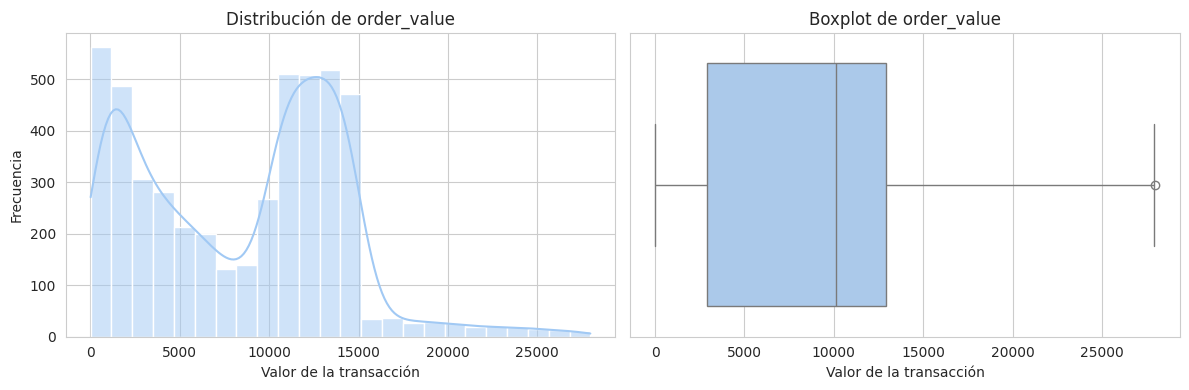

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=everpeak_retail,x='order_value',kde=True,ax=axes[0])
axes[0].set_title('Distribución de order_value')
axes[0].set_xlabel('Valor de la transacción')
axes[0].set_ylabel('Frecuencia')
sns.boxplot(data=everpeak_retail,x='order_value',ax=axes[1])
axes[1].set_title('Boxplot de order_value')
axes[1].set_xlabel('Valor de la transacción')
axes[1].set_ylabel('')  # opcional, el boxplot horizontal no necesita eje y
plt.tight_layout()
plt.show()

Tras la **eliminación de valores atípicos** identificados previamente, se realizó el **resumen estadístico** de la variable **`order_value`** con el fin de evaluar su comportamiento central y dispersión 📊.

El conjunto resultante contiene **4,843 transacciones**, lo que indica que la depuración no afectó de manera significativa el tamaño del dataset. El **valor promedio** de las transacciones es de **8,507.72**, mientras que la **mediana** se ubica en **10,136.00**, lo cual sugiere que los valores centrales están relativamente concentrados en el rango medio–alto del dataset.

La **desviación estándar (5,646.25)** refleja una variabilidad considerable en el valor de las compras, consistente con un negocio que maneja distintos niveles de gasto por transacción. Los percentiles muestran que el **50 % de las compras** se encuentran entre **2,891.50** y **12,900.00**, delimitando un rango intercuartílico amplio.

🧠 **Sesgo de la distribución**
A pesar del tratamiento de atípicos, la distribución mantiene un **sesgo positivo (asimetría a la derecha)**. Esto se observa en la diferencia entre el valor mínimo (**12.00**) y el máximo (**27,968.00**), así como en la cola derecha aún presente en la distribución. Este sesgo es esperado en variables monetarias y no representa un problema, siempre que se considere en la interpretación y segmentación.

> 💡 *El resumen estadístico confirma que `order_value` es una variable adecuada para segmentación por valor, con suficiente variabilidad y sin distorsiones extremas tras la limpieza.*


#### `customer_age`

In [ ]:
everpeak_retail['customer_age'].describe().to_frame().T.round(2)

,count,mean,std,min,25%,50%,75%,max
customer_age,4843.0,49.52,17.78,18.0,35.0,49.12,65.0,80.0


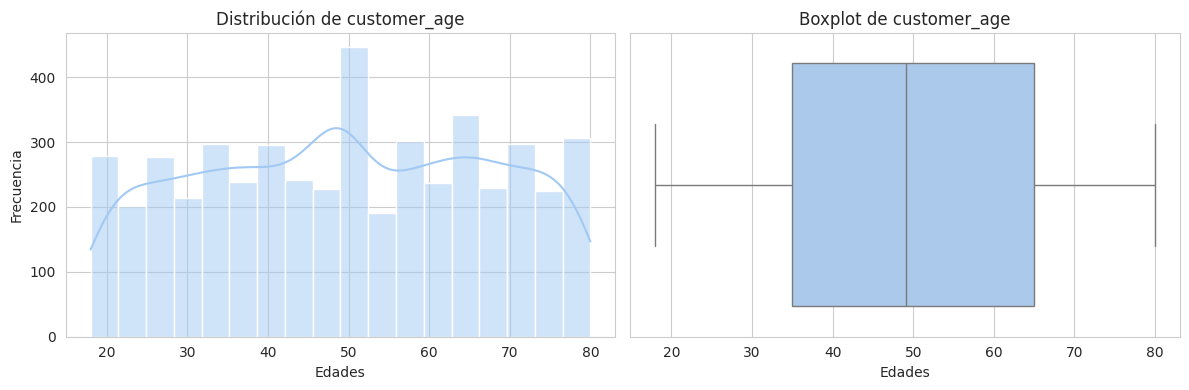

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=everpeak_retail,x='customer_age',kde=True,ax=axes[0])
axes[0].set_title('Distribución de customer_age')
axes[0].set_xlabel('Edades')
axes[0].set_ylabel('Frecuencia')
sns.boxplot(data=everpeak_retail,x='customer_age',ax=axes[1])
axes[1].set_title('Boxplot de customer_age')
axes[1].set_xlabel('Edades')
axes[1].set_ylabel('')  # opcional, el boxplot horizontal no necesita eje y
plt.tight_layout()
plt.show()

Después del tratamiento de valores atípicos, se realizó el **análisis estadístico de la variable `customer_age`** con el fin de entender la composición etaria de los clientes de **EverPeak** 👥📊.

El conjunto de datos resultante cuenta con **4,843 clientes**, manteniendo la coherencia con el análisis previo de `order_value`. La **edad promedio** es de **49.52 años**, mientras que la **mediana** se sitúa en **49.12 años**, lo que indica una distribución **bastante balanceada alrededor del centro**.

La **desviación estándar (17.78)** muestra una dispersión amplia, reflejando una base de clientes diversa en términos de edad. Los percentiles indican que el **50 % de los clientes** se concentra entre los **35 y 65 años**, abarcando etapas de adultos jóvenes, adultos consolidados y adultos senior.

🧠 **Forma de la distribución**
A diferencia de `order_value`, la distribución de `customer_age` es **relativamente simétrica**, sin colas extremas ni acumulaciones anómalas en los límites. Los valores mínimo (**18 años**) y máximo (**80 años**) son coherentes con el contexto del negocio y no sugieren errores de registro.

> 💡 *La variable `customer_age` presenta una distribución estable y realista, lo que la convierte en una base sólida para definir segmentos etarios en el análisis de clientes de EverPeak.*


### Segmentación

---

La gerencia nos ha dado esta propuesta para la segmentación de los clientes, esta se fundamenta en combinar dos variables clave del negocio: **valor de gasto (`order_value`)** y **edad del cliente (`customer_age`)**, ambas previamente analizadas y validadas desde el punto de vista estadístico 📊🧠.

Desde una perspectiva estratégica, el **nivel de gasto** permite identificar el aporte económico directo de cada cliente al negocio, mientras que la **edad** funciona como un proxy de etapa de vida, comportamiento de consumo y potencial de largo plazo. Al integrar ambas dimensiones, la segmentación no solo distingue cuánto gastan los clientes, sino también **quiénes son y en qué momento de su ciclo de vida se encuentran**.


<center>
  <img src="https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_refactored_V8/ES/sprint_7/7.3.img1.png" alt="EverPeak Retail Segmentation" style="max-width:100%; height:auto;" width="75%">
</center>



Desde una perspectiva estratégica, el **nivel de gasto** permite identificar el aporte económico directo de cada cliente al negocio, mientras que la **edad** funciona como un proxy de etapa de vida, comportamiento de consumo y potencial de largo plazo. Al integrar ambas dimensiones, la segmentación no solo distingue cuánto gastan los clientes, sino también **quiénes son y en qué momento de su ciclo de vida se encuentran**.


**Resultados**

| Segmento          |   Clientes |
|:-----------------|--------:|
| Senior VIP       |    2005 |
| Low Value        |    1699 |
| Jr. Medium Value |     654 |
| Junior VIP       |     485 |


Los resultados de la segmentación permiten obtener una **lectura clara de la estructura actual de la base de clientes de EverPeak** y refuerzan la validez del enfoque propuesto 📊🧠.

El segmento **Senior VIP** concentra **2,005 clientes**, siendo el grupo más numeroso. Esto indica que una parte significativa del valor del negocio proviene de clientes con **alto gasto y mayor edad**, lo que sugiere relaciones comerciales más maduras, patrones de compra estables y un alto potencial de **retención y lealtad**. Para SilverBasket, este segmento representa un **activo estratégico** durante el proceso de integración.

El segmento **Low Value**, con **1,699 clientes**, constituye el segundo grupo más grande. Aunque su aporte individual es bajo, su volumen lo convierte en un segmento relevante para estrategias de **activación, upselling o migración hacia niveles de mayor valor**. También funciona como termómetro para evaluar oportunidades de crecimiento orgánico.

Los segmentos **Jr. Medium Value (654 clientes)** y **Junior VIP (485 clientes)**, aunque más pequeños, son especialmente interesantes desde una perspectiva de **crecimiento futuro**. Estos clientes combinan edad relativamente baja con capacidad de gasto media o alta, lo que los convierte en candidatos naturales para estrategias de fidelización temprana y aumento de valor a largo plazo.

🧠 **Lectura global**
La distribución resultante muestra una base de clientes **bien diferenciada**, sin concentraciones artificiales ni segmentos residuales excesivamente pequeños. Esto confirma que los criterios de segmentación elegidos (gasto y edad) capturan patrones reales del negocio y generan grupos **interpretables y accionables**.

> 💡 *En conjunto, la segmentación ofrece a SilverBasket una visión equilibrada entre clientes que sostienen el valor actual de EverPeak y aquellos que representan su potencial de crecimiento futuro.*


#### Código de referencia

In [ ]:
def group_by_age_and_order_value(row):
    age = row['customer_age']
    spend = row['order_value']

    # Manejo de valores nulos/faltantes

    if pd.isna(age) or pd.isna(spend):
        return "Error en Datos"

    # Segmentación

    if spend >= 10000 and age >= 55:
        return "Senior VIP"
    elif spend >= 10000 and age < 55:
        return "Junior VIP"
    elif spend >= 5000 and age >= 55:
        return "Sr. Medium Value"
    elif spend >= 5000 and age < 55:
        return "Jr. Medium Value"
    else:
        return "Low Value"


In [ ]:
everpeak_retail['segment'] = everpeak_retail.apply(group_by_age_and_order_value,axis=1)

In [ ]:
print(everpeak_retail['segment'].value_counts().to_markdown())

| segment          |   count |
|:-----------------|--------:|
| Senior VIP       |    2005 |
| Low Value        |    1699 |
| Jr. Medium Value |     654 |
| Junior VIP       |     485 |


<h2 >
Comparte tus resultados en Github
<img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="GitHub Logo" width="32" style="vertical-align: middle; margin-left: 8px;">
</h2>


Como siguiente paso del proyecto, es necesario **publicar el notebook junto con un archivo README en GitHub** 📁🚀. Esta acción responde a una necesidad del negocio de **documentar, versionar y compartir** de forma transparente el análisis realizado durante el proceso de evaluación de EverPeak.

Centralizar el trabajo en un repositorio permite que los equipos de **Estrategia, Integración y Analítica** puedan revisar el enfoque, reproducir los resultados y reutilizar el pipeline de limpieza y segmentación en futuras etapas del proceso de adquisición o en otras marcas del portafolio.


A continuación se describe el **proceso paso a paso para subir un notebook a GitHub directamente desde Google Colab**, sin necesidad de descargar archivos localmente 📘☁️➡️🐙.

🟢 **1. Crear o iniciar sesión en GitHub**
- Ingresa a 👉 https://github.com
- Inicia sesión o crea una cuenta si aún no tienes una.
- Verifica que puedes crear repositorios.

🟢 **2. Crear un repositorio en GitHub**
- Haz clic en **New repository**
- Define:
  - **Nombre del repositorio** (ej. `everpeak-segmentation-analysis`)
  - Visibilidad: **Public** o **Private** según lo requerido
- Marca **Add a README file**
- Haz clic en **Create repository**

🟢 **3. Abrir el notebook en Google Colab**
- Ingresa a 👉 https://colab.research.google.com
- Abre tu notebook de EverPeak
- Asegúrate de que el análisis esté completo y correctamente documentado ✅

🟢 **4. Guardar el notebook directamente en GitHub**
- En Colab, ve al menú:
  - `File` → `Save a copy in GitHub`
- Si es la primera vez:
  - Autoriza a Colab para acceder a tu cuenta de GitHub 🔐

🟢 **5. Configurar la subida**
- Selecciona:
  - **Repositorio** de destino
  - **Branch** (normalmente `main`)
  - **Ruta** del archivo (opcional)
- Agrega un **mensaje de commit** descriptivo  
  (ej. *"Add EverPeak customer segmentation notebook"*)
- Haz clic en **OK**

🟢 **6. Editar el README desde GitHub**
- En el repositorio, abre `README.md`
- Describe brevemente:
  - Contexto del negocio
  - Objetivo del análisis
  - Contenido del notebook
- Guarda los cambios con un commit

🟢 **7. Verificación final**
- Confirma que:
  - El notebook se visualiza correctamente en GitHub 📊
  - El historial de commits refleja el trabajo realizado
  - El repositorio está listo para revisión por el equipo

> 💡 *Este flujo permite mantener el análisis sincronizado con GitHub y refuerza las buenas prácticas de versionado y colaboración en proyectos de datos.*

## 🚀 Para seguir aprendiendo :

---

- 📚 Vuelve a revisar este notebook y trata resolver por tu cuenta  nuevamente
- 💬 Recuerda que en Discord puedes dejar todos tus comentarios y dudas sobre el contenido del sprint en [`Discord`](https://discord.com/channels/1081207584104656986/1420849538196836472).
    - 📝 Si tienes preguntas sobre tu proyecto, usa el canal [`#project`](https://discord.com/channels/1081207584104656986/1420848813186351134) para recibir ayuda y compartir ideas.
    - 🤝 Aprovecha el espacio de `CoLearning` para aclarar tus dudas junto con otros estudiantes e instructores: [Co-Learning](https://discord.com/channels/1081207584104656986/1197953851391746119).
    - En tus preguntas recuerda etiquetar a `@Dataconsulta` y ubica tu pregunta de acuerdo a `Sprint/Capitulo/Seccion`
- 📅 ¿Necesitas ayuda personalizada? Puedes agendar una sesión `1:1` conmigo aquí: [1:1 Roman Castillo](https://scheduler.zoom.us/roman-castillo/1-1-roman-castillo).

- Por último hazme paro y responde la encuesta al final de la sesión, me sirve para poder ayudarte mejor

¡Sigue practicando y no dudes en pedir apoyo cuando lo necesites! 💪✨